In [27]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

#Вторая переменная отвечает за вывод изображений(в тестовом режиме игнорируется)
def nash_equilibrium(A, v=1):
    n=A.shape[0]#Gettinh Размер матрицы
    m=A.shape[1]
    k=0
    while np.min(A)<1:#Прибавление числа матрице игры не влияет на ответ
        A=A+1         #Минимальный элемент матрицы должен быть не менее единицы, тчобы значение функции не было отрицательным
        k=k+1
    b=np.zeros((n))+1 #Вектор ограничений
    d=np.zeros((m))+1
    res1=linprog(b,-A.transpose(),-d)#решаем задачу ЛП на минимум
    res2=linprog(-d,A,b)#Сводим задачу максимизирования на минимум
    str1=res1.x/res1.fun#получаем оптимальную стратегию первого игрока
    str2=res2.x/-res2.fun#соответственно второго
    cost=1/res1.fun-k#Вычисляем значение игры
    if v==1:#Если не тетстовый режим
        print("Оптимальная стратегия первого игрока: ",str1)#Выводим решение задачи
        print()
        print("Оптимальная стратегия второго игрока: ",str2)
        print()
        print("Цена игры: ",cost)

        fig1=plt.figure()#Выводим графики оптимальных стратегий
        for i in range(n):
            plt.scatter(i+1,str1[i])
        plt.title("Оптимальная стратегия первого игрока")
        plt.grid()
        
        fig2=plt.figure()
        for i in range(m):
            plt.scatter(i+1,str2[i])
        plt.title("Оптимальная стратегия второго игрока")
        plt.grid()
    
        plt.show()
    
    return cost

# Решение в чистой стратегии

Оптимальная стратегия первого игрока:  [ 0.  0.  1.]

Оптимальная стратегия второго игрока:  [ 1.  0.  0.]

Цена игры:  6.0


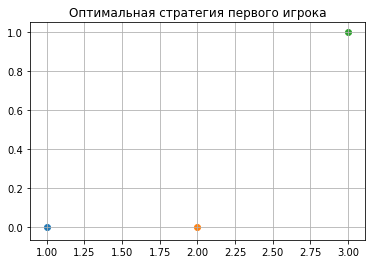

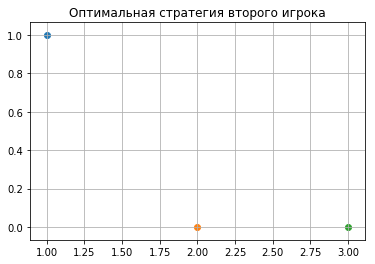

5.9999999999999991

In [28]:
A = np.array([[1 ,2, 3],[4, 5, 6],[7, 8, 9]])
nash_equilibrium(A)

# Спектр оптимальных стратегий неполон

Оптимальная стратегия первого игрока:  [ 0.45454545  0.54545455  0.        ]

Оптимальная стратегия второго игрока:  [ 0.          0.90909091  0.          0.09090909]

Цена игры:  5.45454545455


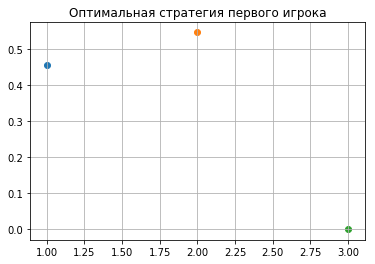

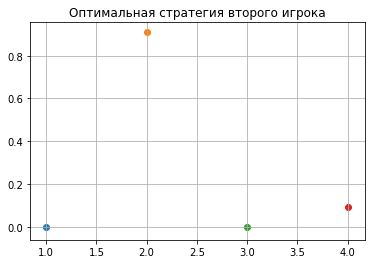

5.4545454545454541

In [29]:
A = np.array([[5 ,6, 3, 0],[10, 5, 12, 10],[10, 0, 5, 20]])
nash_equilibrium(A)

# Спектр оптимальных стратегий полон

Оптимальная стратегия первого игрока:  [ 0.4  0.6]

Оптимальная стратегия второго игрока:  [ 0.2  0.8]

Цена игры:  2.4


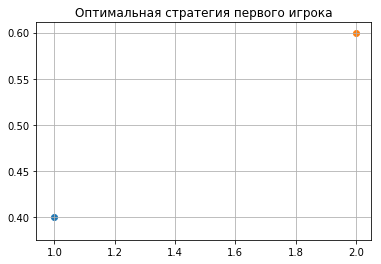

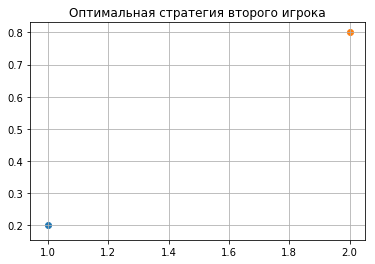

2.3999999999999999

In [30]:
A = np.array([[-1 ,2 ],[3, 1]])
nash_equilibrium(A)

# Unit-тесты

In [31]:
import unittest
import numpy as np

class NashTest(unittest.TestCase):
    def test_nash0(self):
        A = np.array([[1 ,2, 3],[4, 5, 6],[7, 8, 9]])
        self.assertEqual(nash_equilibrium(A,0)-6.0 < 0.00001,1)
        
    def test_nash1(self):
        A = np.array([[5 ,6, 3, 0],[10, 5, 12, 10],[10, 0, 5, 20]])
        self.assertEqual(nash_equilibrium(A,0)-5.45454545455 < 0.00001,1)
    
    def test_nash2(self):
        A = np.array([[-1 ,2 ],[3, 1]])
        self.assertEqual(nash_equilibrium(A,0)-2.4 < 0.00001,1)
        
    def test_nash3(self):
        A = np.array([[0 ,0 ],[0, 0]])
        self.assertEqual(nash_equilibrium(A,0)-0 < 0.00001,1)
        
unittest.main(argv=['first-arg-is-ignored'], exit=False)

....
----------------------------------------------------------------------
Ran 4 tests in 0.056s

OK
